In [1]:
import pandas as pd

import numpy as np

import matplotlib as plt

import seaborn as sns

In [3]:
### Read the dataset

df= pd.read_csv(r"C:\Users\jitud\Desktop\Data Science\Coding\Kaggle\Netflix\netflix_titles.csv")

df['date_added']=pd.to_datetime(df['date_added'].str.strip(), format= "%B %d, %Y")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
### Checking the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [6]:
### Checking the Missing Values

df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Checking the Missing Values and filling the missing values

In [7]:
### Missing Values in Director, Case, Country, date added, rating, duration.
### Filling it up with Unknown as we cannot imputate it as these are not numerical variables.

df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

In [9]:
## Re-Checking the Missing Values

df.isnull().sum().sort_values(ascending=False)

date_added      10
rating           4
duration         3
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
listed_in        0
description      0
dtype: int64

In [10]:
## Dropping rows with NA or missing values as the number is low

df.dropna(subset=['date_added','rating','duration'], inplace=True)

In [11]:
## Rechecking the Missing Values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
### Creating 2 columns 'Year Added' and 'Month Added'



df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

In [13]:
##Changing the month number to month name

import calendar

df['month_added'] = df['month_added'].apply(lambda x: calendar.month_abbr[x])

In [14]:
### Chekcing if the columns has been added or not

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Sep
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Sep
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Sep
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Sep
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Sep


Data Analysis- EDA 

1. Movies vs TV shows - Which type of content Netflix have the most?

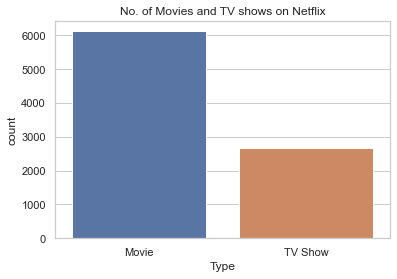

In [16]:
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
ax = sns.countplot(x='type',data=df)

plt.xlabel("Type")
plt.title('No. of Movies and TV shows on Netflix')
plt.show()



Oberavations:- Movies are more compared to TV shows in Netflix.

2. On which year netflix has added the highest content?

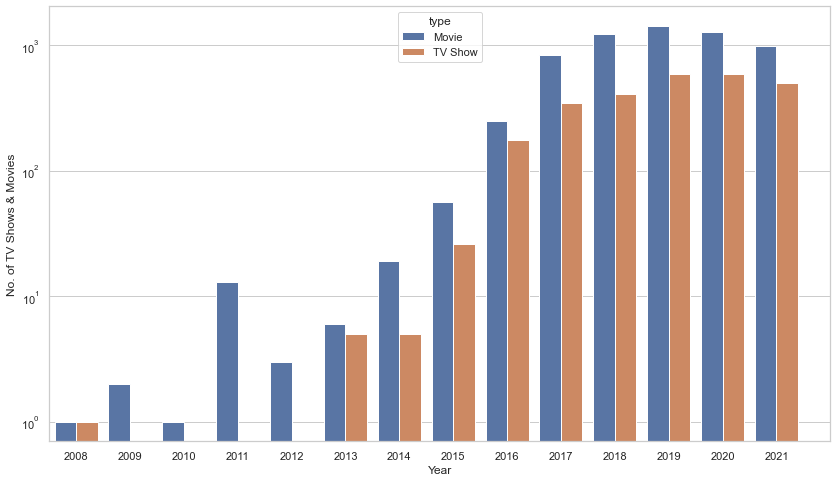

In [17]:
d_data = df.copy()
y_data = d_data[['year_added','type']].value_counts().sort_index()
y_data = y_data.reset_index(level=1,name='count')
plt.figure(figsize=(14,8))
ax = sns.barplot(x=y_data.index,y='count',hue='type',data=y_data)

ax.set_xlim(-0.5,14)
ax.set_yscale('log')
plt.xlabel('Year')
plt.ylabel('No. of TV Shows & Movies')
plt.show()

Observations:-

1. Between 2016-2021- Netflix has added more content then the previous years.
2. 2019 is the year where Netflix has added the highest Movies and TV shows.


3. What are the ratings present in Movies and TV Shows?

c:\Users\jitud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


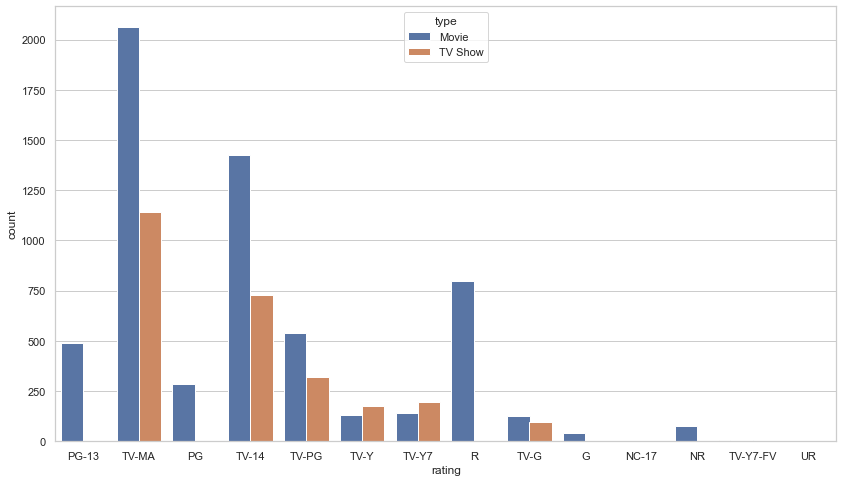

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(df['rating'],hue='type',data=df)
plt.show()

Obervations:- Highest number of Movies and TV shows are rated as TV-MA


4. Which are the Top 10 Countries whose TV Shows and Movies are present in Dataset?


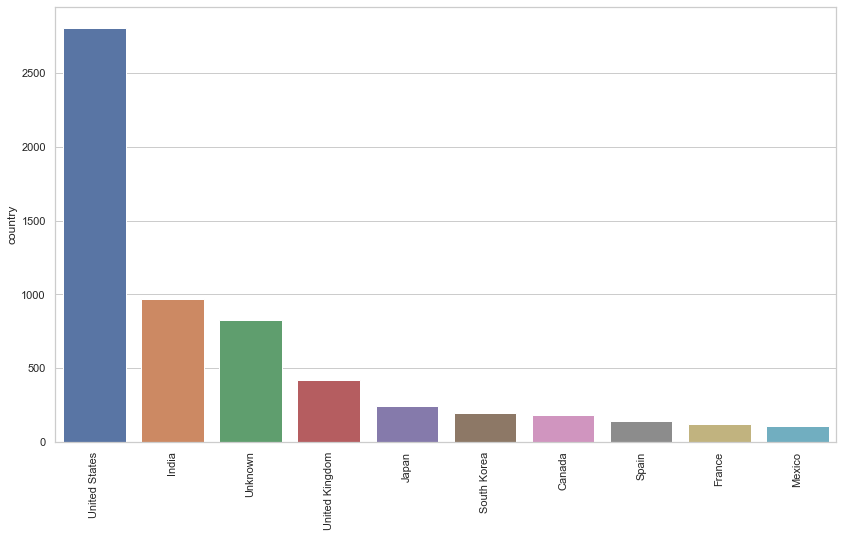

In [19]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['country'].value_counts().head(10).index, y=df['country'].value_counts().head(10),data=df)
plt.xticks(rotation=90)
plt.show()

Obervations:-

1. US has the highest follwed by India.

5. Top 5 Directors with the highest count of movies/ tv shows?


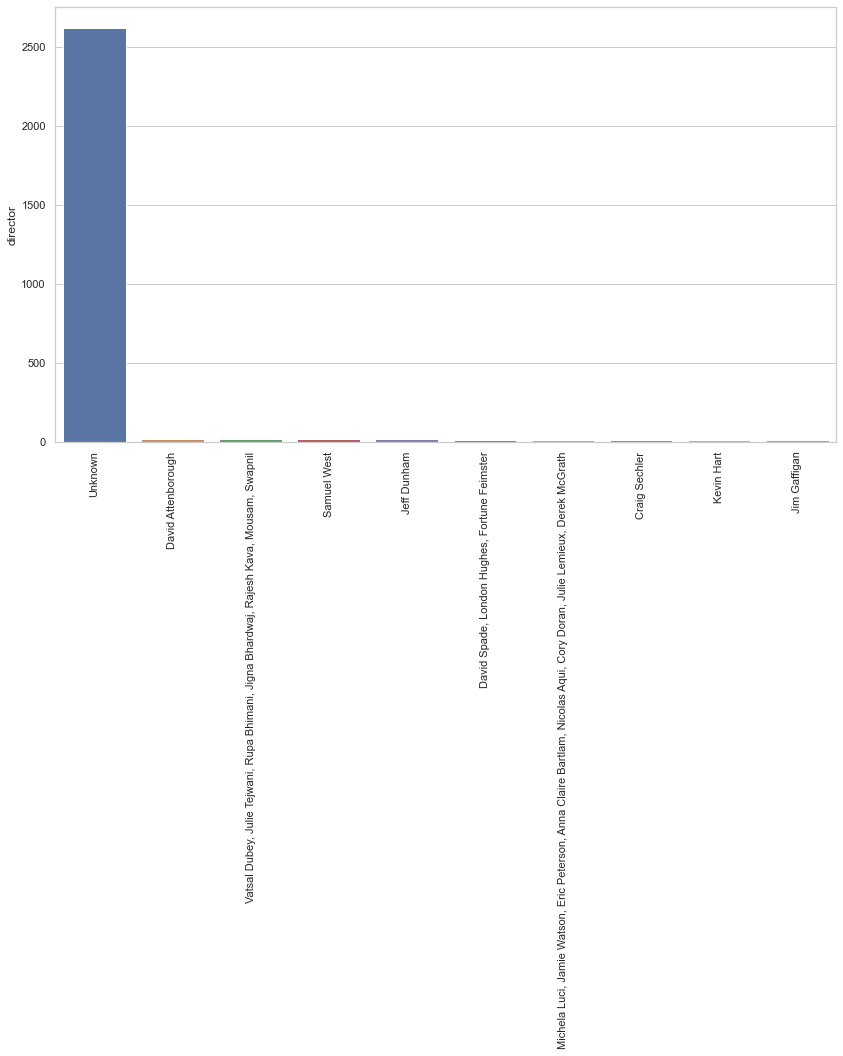

In [38]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['cast'].value_counts().head(10).index, y=df['director'].value_counts().head(10),data=df)
plt.xticks(rotation=90)
plt.show()